### Import Libraries

In [1]:
import numpy as np
from scipy.io import arff
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix

### Load Data

In [2]:
#Loading the arff data
data_1year = arff.loadarff('./data/1year.arff')
data_2year = arff.loadarff('./data/2year.arff')
data_3year = arff.loadarff('./data/3year.arff')
data_4year = arff.loadarff('./data/4year.arff')
data_5year = arff.loadarff('./data/5year.arff')

#Creating five separate dataframes
data_1year = pd.DataFrame(data_1year[0])
data_2year = pd.DataFrame(data_2year[0])
data_3year = pd.DataFrame(data_3year[0])
data_4year = pd.DataFrame(data_4year[0])
data_5year = pd.DataFrame(data_5year[0])

### Ensure Data Loaded

In [3]:
data_1year.head(5)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0'
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0'
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0'
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0'
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0'


In [4]:
data_2year.head(5)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.202350,0.46500,0.240380,1.5171,-14.547,0.510690,0.25366,0.91816,1.15190,0.42695,...,0.13184,0.473950,0.86816,0.00024,8.5487,5.16550,107.740,3.38790,5.3440,b'0'
1,0.030073,0.59563,0.186680,1.3382,-37.859,-0.000319,0.04167,0.67890,0.32356,0.40437,...,0.12146,0.074369,0.87235,0.00000,1.5264,0.63305,622.660,0.58619,1.2381,b'0'
2,0.257860,0.29949,0.665190,3.2211,71.799,0.000000,0.31877,2.33200,1.67620,0.69841,...,0.16499,0.369210,0.81614,0.00000,4.3325,3.19850,65.215,5.59690,47.4660,b'0'
3,0.227160,0.67850,0.042784,1.0828,-88.212,0.000000,0.28505,0.47384,1.32410,0.32150,...,0.29358,0.706570,0.78617,0.48456,5.2309,5.06750,142.460,2.56210,3.0066,b'0'
4,0.085443,0.38039,0.359230,1.9444,21.731,0.187900,0.10823,1.37140,1.11260,0.52167,...,0.10124,0.163790,0.89876,0.00000,5.7035,4.00200,89.058,4.09840,5.9874,b'0'


In [5]:
data_3year.head(5)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,b'0'
1,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,b'0'
2,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,b'0'
3,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,0.56453,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,b'0'
4,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,0.58496,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,b'0'


In [6]:
data_4year.head(5)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.159290,0.46240,0.07773,1.1683,-44.853,0.467020,0.189480,0.82895,1.1223,0.38330,...,0.108990,0.41557,0.89101,0.001422,7.7928,4.9914,119.810,3.0465,3.0560,b'0'
1,-0.127430,0.46243,0.26917,1.7517,7.597,0.000925,-0.127430,1.16250,1.2944,0.53757,...,-0.089372,-0.23704,1.06250,0.150410,5.4327,3.4629,100.970,3.6150,3.4725,b'0'
2,0.070488,0.23570,0.52781,3.2393,125.680,0.163670,0.086895,2.87180,1.0574,0.67689,...,0.054286,0.10413,0.94571,0.000000,7.1070,3.3808,76.076,4.7978,4.7818,b'0'
3,0.136760,0.40538,0.31543,1.8705,19.115,0.504970,0.136760,1.45390,1.1144,0.58938,...,0.102630,0.23203,0.89737,0.073024,6.1384,4.2241,88.299,4.1337,4.6484,b'0'
4,-0.110080,0.69793,0.18878,1.2713,-15.344,0.000000,-0.110080,0.43282,1.7350,0.30207,...,0.439880,-0.36440,0.57153,0.000000,18.8010,2.7925,146.390,2.4934,15.0360,b'0'


In [7]:
data_5year.head(5)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.088238,0.55472,0.01134,1.0205,-66.5200,0.342040,0.109490,0.57752,1.0881,0.32036,...,0.080955,0.275430,0.91905,0.002024,7.2711,4.7343,142.760,2.5568,3.2597,b'0'
1,-0.006202,0.48465,0.23298,1.5998,6.1825,0.000000,-0.006202,1.06340,1.2757,0.51535,...,-0.028591,-0.012035,1.00470,0.152220,6.0911,3.2749,111.140,3.2841,3.3700,b'0'
2,0.130240,0.22142,0.57751,3.6082,120.0400,0.187640,0.162120,3.05900,1.1415,0.67731,...,0.123960,0.192290,0.87604,0.000000,8.7934,2.9870,71.531,5.1027,5.6188,b'0'
3,-0.089951,0.88700,0.26927,1.5222,-55.9920,-0.073957,-0.089951,0.12740,1.2754,0.11300,...,0.418840,-0.796020,0.59074,2.878700,7.6524,3.3302,147.560,2.4735,5.9299,b'0'
4,0.048179,0.55041,0.10765,1.2437,-22.9590,0.000000,0.059280,0.81682,1.5150,0.44959,...,0.240400,0.107160,0.77048,0.139380,10.1180,4.0950,106.430,3.4294,3.3622,b'0'


### Number and name of features all the same? If so, combine.

In [8]:
len(data_1year.columns) == len(data_2year.columns) == len(data_3year.columns) == len(data_4year.columns) == len(data_5year.columns)

True

In [9]:
print((data_1year.columns) == (data_2year.columns))
print((data_1year.columns) == (data_3year.columns))
print((data_1year.columns) == (data_4year.columns))
print((data_1year.columns) == (data_5year.columns))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True

In [10]:
data = pd.concat([data_1year, data_2year, data_3year, data_4year, data_5year], ignore_index=True)
len(data_1year) + len(data_2year) + len(data_3year) + len(data_4year) + len(data_5year) == len(data)

True

In [11]:
data

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.396410,2.04720,32.3510,0.38825,0.249760,1.33050,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,b'0'
1,0.209120,0.49988,0.472250,1.94470,14.7860,0.00000,0.258340,0.99601,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,b'0'
2,0.248660,0.69592,0.267130,1.55480,-1.1523,0.00000,0.309060,0.43695,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,b'0'
3,0.081483,0.30734,0.458790,2.49280,51.9520,0.14988,0.092704,1.86610,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,b'0'
4,0.187320,0.61323,0.229600,1.40630,-7.3128,0.18732,0.187320,0.63070,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43400,0.012898,0.70621,0.038857,1.17220,-18.9070,0.00000,0.013981,0.41600,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,b'1'
43401,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.57805,-0.578050,-0.40334,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,b'1'
43402,-0.179050,1.25530,-0.275990,0.74554,-120.4400,-0.17905,-0.154930,-0.26018,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,b'1'
43403,-0.108860,0.74394,0.015449,1.08780,-17.0030,-0.10886,-0.109180,0.12531,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,b'1'


In [12]:
np.unique(data['class'])

array([b'0', b'1'], dtype=object)

### Missing Data

In [13]:
values_data = pd.DataFrame(data.isnull().sum())
percentage_data = pd.DataFrame(((data.isnull().sum())/len(data))*100)
print(values_data)
print(percentage_data)

          0
Attr1     8
Attr2     8
Attr3     8
Attr4   134
Attr5    89
...     ...
Attr61  102
Attr62  127
Attr63  134
Attr64  812
class     0

[65 rows x 1 columns]
               0
Attr1   0.018431
Attr2   0.018431
Attr3   0.018431
Attr4   0.308720
Attr5   0.205046
...          ...
Attr61  0.234996
Attr62  0.292593
Attr63  0.308720
Attr64  1.870752
class   0.000000

[65 rows x 1 columns]


In [14]:
missing_data = pd.concat([values_data, percentage_data], axis=1)
missing_data.columns = ['Number of Missing Values','Percentage of Dataset']
pd.set_option('display.max_rows', 65)
missing_data.sort_values('Percentage of Dataset', ascending = False)

,Number of Missing Values,Percentage of Dataset
Attr37,18984,43.736897
Attr21,5854,13.486925
Attr27,2764,6.367930
Attr60,2152,4.957954
Attr45,2147,4.946435
Attr24,922,2.124179
Attr64,812,1.870752
Attr53,812,1.870752
Attr28,812,1.870752
Attr54,812,1.870752


In [15]:
data.iloc[:, 0]

0        0.200550
1        0.209120
2        0.248660
3        0.081483
4        0.187320
           ...   
43400    0.012898
43401   -0.578050
43402   -0.179050
43403   -0.108860
43404   -0.105370
Name: Attr1, Length: 43405, dtype: float64

In [16]:
data = data.replace(b'0','NO')
data = data.replace(b'1','YES')
data = data.drop(['Attr37'], axis=1)
data

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.396410,2.04720,32.3510,0.38825,0.249760,1.33050,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,NO
1,0.209120,0.49988,0.472250,1.94470,14.7860,0.00000,0.258340,0.99601,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,NO
2,0.248660,0.69592,0.267130,1.55480,-1.1523,0.00000,0.309060,0.43695,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,NO
3,0.081483,0.30734,0.458790,2.49280,51.9520,0.14988,0.092704,1.86610,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,NO
4,0.187320,0.61323,0.229600,1.40630,-7.3128,0.18732,0.187320,0.63070,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43400,0.012898,0.70621,0.038857,1.17220,-18.9070,0.00000,0.013981,0.41600,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,YES
43401,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.57805,-0.578050,-0.40334,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,YES
43402,-0.179050,1.25530,-0.275990,0.74554,-120.4400,-0.17905,-0.154930,-0.26018,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,YES
43403,-0.108860,0.74394,0.015449,1.08780,-17.0030,-0.10886,-0.109180,0.12531,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,YES


### Imputation

In [17]:
#data.to_csv(r'/Users/ZacharyHarris/Documents/GitHub/Bank/data.csv', index = True)
#missing_data.to_csv(r'/Users/ZacharyHarris/Documents/GitHub/Bank/missing_data.csv', index = True)


In [18]:
i = np.arange(len(data.columns))
for i in np.arange(len(data.columns)-1):
    data.iloc[:, i].fillna(data.iloc[:, i].mean(), inplace = True)

### Decision Tree Classifier

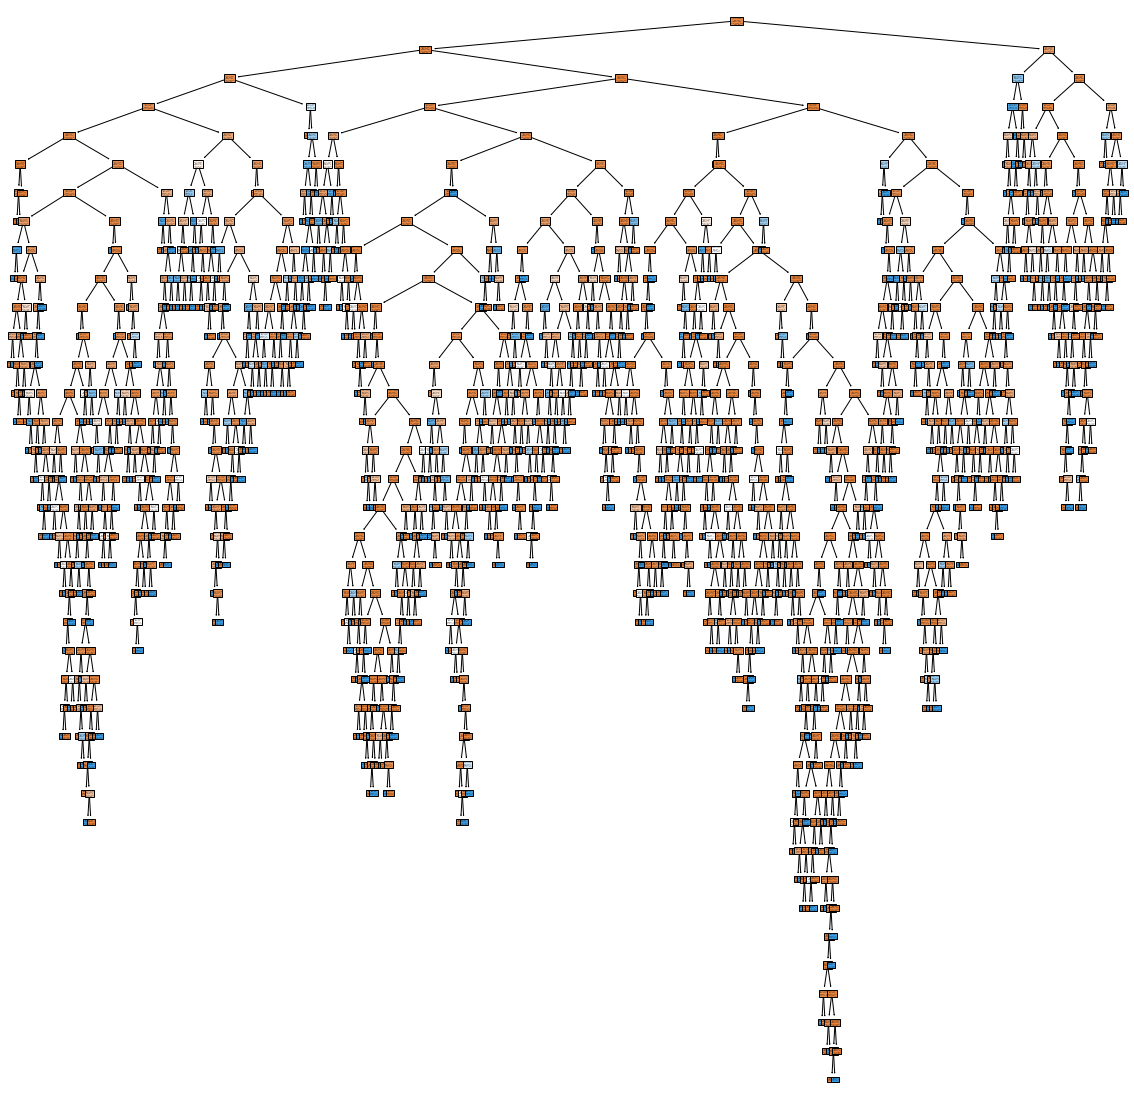

In [19]:
X = data.loc[:, data.columns != 'class']
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
plt.rcParams["figure.figsize"] = (20,20)
tree.plot_tree(clf, feature_names = data.columns, class_names = ["NO","YES"], filled = True)
plt.show()

In [20]:
clf.score(X_test, y_test)

0.9485809067453004

In [21]:
y_pred = clf.predict(X_test)

In [22]:
print(recall_score(y_test, y_pred, average="binary", pos_label="NO"))


0.9713870029097963


In [23]:
print(precision_score(y_test, y_pred, pos_label = "NO"))


0.9744113640786145


In [24]:
confusion_matrix(y_test, y_pred)

array([[10015,   295],
       [  263,   279]])

### Random Forest Classifier

In [25]:
x=[0,0,0,0,0,0,0,0,0,0]
y=[0,0,0,0,0,0,0,0,0,0]
for i in np.arange(10):
    modelRF = RandomForestClassifier(n_estimators=100,
                                     criterion='gini', 
                                     max_depth=None, 
                                     min_samples_split=2, 
                                     min_samples_leaf=1, 
                                     min_weight_fraction_leaf=0.0, 
                                     max_features='auto', 
                                     max_leaf_nodes=None, 
                                     min_impurity_decrease=0.0, 
                                     bootstrap=True, 
                                     oob_score=False, 
                                     n_jobs=None, 
                                     random_state=None, 
                                     verbose=0, 
                                     warm_start=False, 
                                     class_weight=None, 
                                     ccp_alpha=i/(10**i), 
                                     max_samples=None)
    modelRF.fit(X_train, y_train);
    y[i]=modelRF.score(X_test,y_test);
    x[i]=modelRF.ccp_alpha


Text(0, 0.5, 'Accuracy')

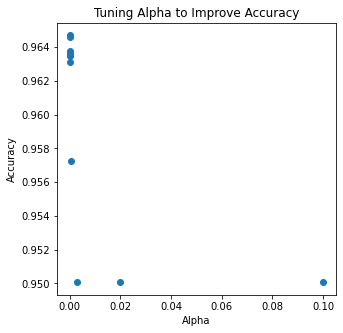

In [26]:
plt.rcParams["figure.figsize"] = (5,5)
plt.scatter(x,y)
plt.title('Tuning Alpha to Improve Accuracy')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')

In [27]:
x

[0.0, 0.1, 0.02, 0.003, 0.0004, 5e-05, 6e-06, 7e-07, 8e-08, 9e-09]

In [28]:
y

[0.964614817545153,
 0.9500552893475857,
 0.9500552893475857,
 0.9500552893475857,
 0.9572429045337265,
 0.9647069664577957,
 0.9631404349428677,
 0.9637854773313674,
 0.9636011795060818,
 0.963509030593439]

In [29]:
modelRF.score(X_test,y_test)
#prediction_RF = modelRF.predict(X_test)

0.963509030593439

In [30]:
y_pred = modelRF.predict(X_test)

In [31]:
print(recall_score(y_test, y_pred, average="binary", pos_label="NO"))



0.9968962172647915


In [32]:
print(precision_score(y_test, y_pred, pos_label="NO"))



0.965795903025747


In [33]:
confusion_matrix(y_test, y_pred)

array([[10278,    32],
       [  364,   178]])

### XGB Model

In [34]:
XGBmodel = XGBClassifier()
XGBmodel.fit(X_train, y_train)

XGBClassifier()

In [35]:
y_pred = XGBmodel.predict(X_test)

In [36]:
XGBmodel.score(X_test,y_test)

0.97005160339108

In [37]:
print(recall_score(y_test, y_pred, average="binary", pos_label="NO"))


0.9994180407371483


In [46]:
print(precision_score(y_test, y_pred,  pos_label="NO"))

0.9699708180363362


In [45]:
confusion_matrix(y_test, y_pred)

array([[10304,     6],
       [  319,   223]])

In [40]:
x=[0,0,0,0,0,0,0,0,0,0]
y=[0,0,0,0,0,0,0,0,0,0]
for i in np.arange(10):
    XGBmodel = XGBClassifier(gamma = i/10)
    XGBmodel.fit(X_train, y_train);
    y[i]=XGBmodel.score(X_test,y_test);
    x[i]=XGBmodel.gamma

Text(0, 0.5, 'Accuracy')

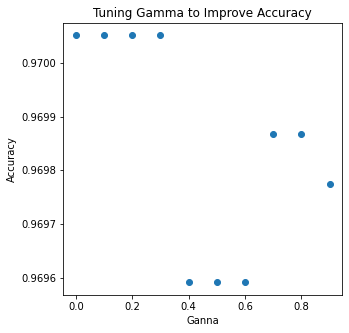

In [43]:
plt.rcParams["figure.figsize"] = (5,5)
plt.scatter(x,y)
plt.title('Tuning Gamma to Improve Accuracy')
plt.xlabel('Ganna')
plt.ylabel('Accuracy')